# PCA

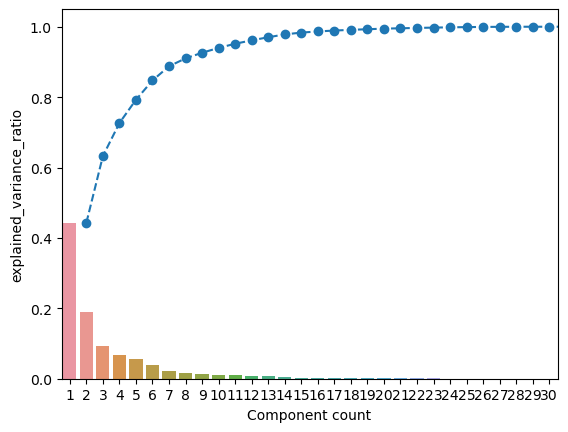

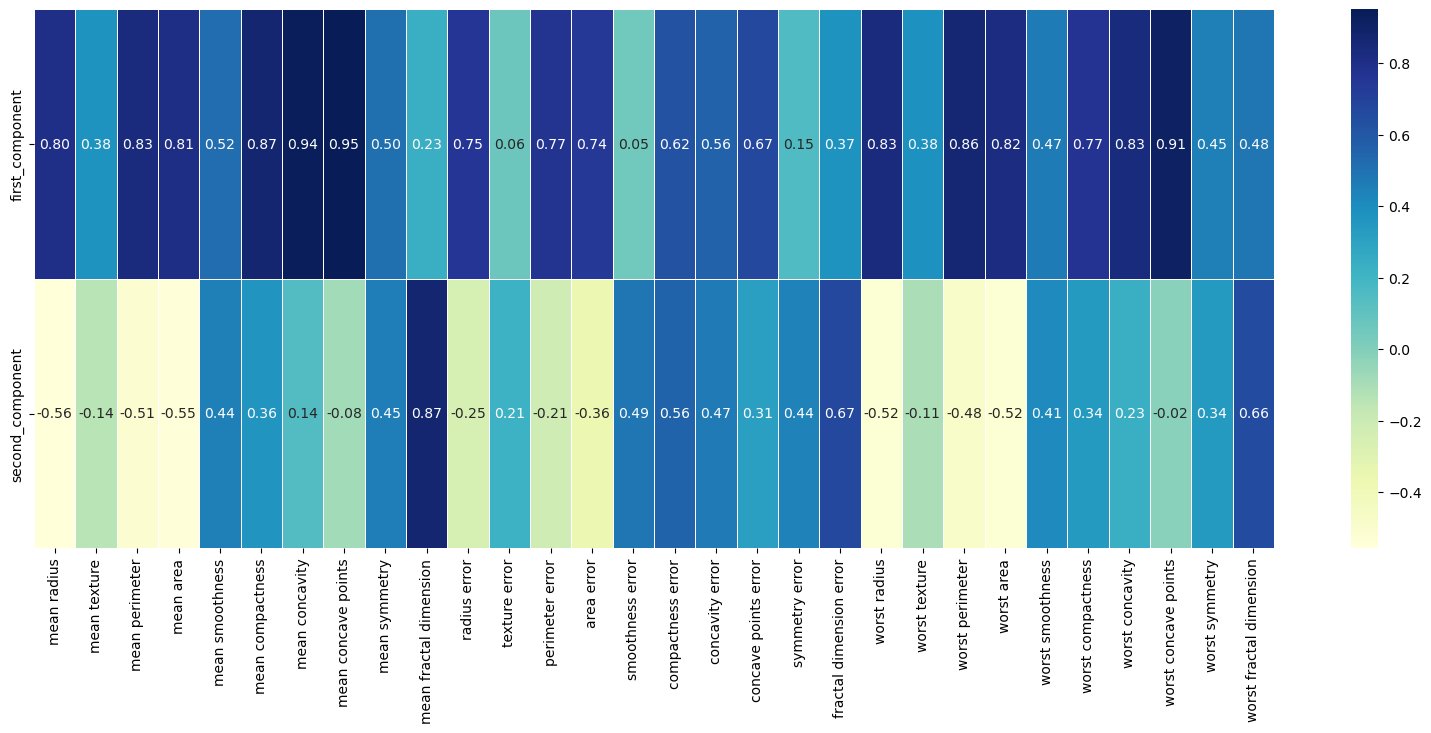

,first_component,second_component,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
first_component,1.000000e+00,-2.780136e-16,0.797767,0.378013,0.829236,0.805393,0.519653,0.872050,0.941713,0.950654,...,0.830910,0.380727,0.862408,0.819517,0.466310,0.765672,0.833719,0.914327,0.447913,0.480273
second_component,-2.780136e-16,1.000000e+00,-0.557903,-0.142438,-0.513349,-0.551270,0.444002,0.362361,0.143534,-0.082943,...,-0.524526,-0.108469,-0.476841,-0.523298,0.411059,0.342564,0.233709,-0.019699,0.338485,0.656865


In [10]:
# 1a) Import relevant libraries
# Import Relevant Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# 1b) Load the Dataset
df = pd.read_csv("sample_PCA.csv") 

# 1c) Dropping Target Variable(Run only if there is target variable available)
X = df.drop("target", axis=1)  # Exclude the target variable as PCA is applied only on the features not the target variable

# 1d) Data Preprocessing - Scaling Features
# Scaling the dataset (excluding target variable if necessary)
scaler = StandardScaler() 
scaled_X = scaler.fit_transform(X)


# 2a) cumulative changes in variance ratio for each added component in plot
pca = PCA().fit(scaled_X)
x = range(1 , 31)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),"--o")
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

# 2b) creating a dataframe of changes in variance for each added component individually and cumulatively
pca = PCA(n_components=30).fit(scaled_X)   # created 30 component
my_dict = {"explained_variance":pca.explained_variance_, 
        "explained_variance_ratio":pca.explained_variance_ratio_,
        "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}
df_ev = pd.DataFrame(my_dict, index = range(1,31))
# 2c) the individual changes in variance for each added component
sns.barplot(x = df_ev.index, y= df_ev.explained_variance_ratio)
df_ev

# 3a) create the number of components you want and see them together in a table
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component"])
# 3b) check the correlation of the components among themselves
component_df.corr().round()

# 4a) The correlation of components with original features of the datasets in a table
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
combined_df = pd.concat([component_df, scaled_df], axis =1)
correlation = combined_df.corr()

# 4b) The correlation of components with original features of the datasets in a heatmap
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()
correlation.head(2)

